In [1]:
class Tp2:
    
    def __init__(self, chemin,separateur):
        self.data = pd.read_csv(chemin,sep=separateur)
    
    def module_ord_decroi(self):
        serieNbActor = pd.Series(self.data.groupby('object_id').actor.nunique()).rename('NbActor')
        #Grouper par module en precisant le nombre de cession
        serieNbCession = pd.Series(self.data.groupby('object_id').session_uuid.count()).rename('NbCession')
        ##Grouper les modules par score maximum
        serieMaxScore = pd.Series(self.data.groupby('object_id').score.max()).rename('MaxScore')
        #Grouper les modules par score minimum
        serieMinScore = pd.Series(self.data.groupby('object_id').score.min()).rename('MinScore')
        #Grouper les modules par score >= 50
        serieNbActor50 = self.data[(self.data['score'] >= 50)].groupby(['object_id']).actor.nunique().rename('NbActor50')
        #Calcul du taux de reussite
        serieTauxReussite = (serieNbActor50/serieNbActor)*100
        serieTauxReussite =serieTauxReussite.rename('TauxReussite')
        #Concatenation des resultats ci-dessus
        resultatFinal = pd.concat([serieNbActor,serieNbCession,serieMinScore,serieMaxScore,serieTauxReussite],axis=1)
        #Trier le resultat final par ordre decroissante
        resultatFinalTout = resultatFinal.sort_values(by=['TauxReussite'],ascending=False)
        resultatFinalTout.TauxReussite = resultatFinalTout.TauxReussite.fillna(0)
        return resultatFinalTout
    
    def representation_info_module_temp_scoreMax(self,module):
        nbTempsActor = self.data[(self.data['object_id'] == module)].groupby('actor').temps.sum().rename('NbTemp')
        nbScoreActor = self.data[(self.data['object_id'] == module )].groupby('actor').score.max().rename('ScoreMax')

        data = pd.concat([nbScoreActor,nbTempsActor], axis = 1)
        data = data.sort_values(by=['NbTemp'],ascending=True)
    #Création et attribution du resultat final de chaque apprenant
        plt.plot(data.NbTemp/60,data.ScoreMax,label=module)
        plt.xlabel('Temps (min)')
        plt.title('Répresntation Graphique des Top 10 Module')
        plt.ylabel('Score Max')
        plt.legend()
    def rep_bar_top10(self):
        x = ['1er','2ème','3ème','4ème','5ème','6ème','7ème','8ème','9ème','10ème']
        couleur = ['blue','black','purple','orange','green','grey','red','yellow','pink','brown']
        plt.bar(x,self.module_ord_decroi()[:10].TauxReussite, color=couleur)
        plt.xlabel('Classement Module')
        plt.ylabel('Taux de Réussite')
        plt.title('Répresentation en bar du taux de réussite des tops 10')
        
    def rep_info_module_selon_rang_score(self,module,ligne,colonne,position):
        nbScoreActor = self.data[(self.data['object_id'] == module )].groupby('actor').score.max().rename('ScoreMax')

        data = pd.DataFrame(nbScoreActor)
        data = data.sort_values(by=['ScoreMax'],ascending=False)
        
        x = list(range(1,len(data.ScoreMax)+1))
        
        plt.subplot(ligne,colonne,position)
        plt.plot(x,data.ScoreMax,label=module)
        plt.xlabel('Rang')
        plt.ylabel('Score Max')
        plt.legend()
        
    def rep_info_module_selon_rang_temps(self,module):
        serieTotalTemp = pd.Series(self.data.groupby('object_id').temps.sum()).rename('TotalTemps')
        data = pd.DataFrame(serieTotalTemp)
        data = data.sort_values(by=['TotalTemps'],ascending=False)
        x = list(range(1,len(data.TotalTemps)+1))
        plt.scatter(x,data.TotalTemps/60,label=module)
        plt.xlabel('Rang')
        plt.ylabel('Temps Total en min')
        
    def rep_camembert_tauxReussite_module(self):
        classeA = (len(self.module_ord_decroi()[self.module_ord_decroi()['TauxReussite'] >= 80])/len(self.module_ord_decroi()))*100
        classeB = (len(self.module_ord_decroi().loc[(self.module_ord_decroi()['TauxReussite'] >= 60) & (self.module_ord_decroi()['TauxReussite'] <80)])/len(self.module_ord_decroi()))*100
        classeC = (len(self.module_ord_decroi().loc[(self.module_ord_decroi()['TauxReussite'] >= 50) & (self.module_ord_decroi()['TauxReussite'] < 60)])/len(self.module_ord_decroi()))*100
        classeD = (len(self.module_ord_decroi()[self.module_ord_decroi()['TauxReussite'] < 50])/len(self.module_ord_decroi()))*100

        resultat = [classeA,classeB,classeC,classeD]
        plt.pie(resultat, labels=['A','B','C','D'], normalize=True,autopct='%1.1f%%')
        plt.title('Diagramme de Camembert du taux de chaque classe selon le taux de réussite de chaque module');

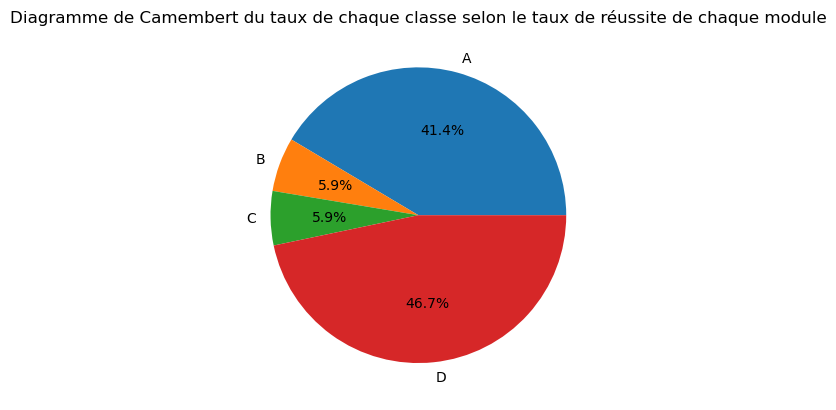

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
path = "/home/issa/Téléchargements/scorm_tracking_copy(1).csv"
exemple1 = Tp2(path,';')
df2 = exemple1.module_ord_decroi().reset_index().values
#for i in range(3):
    #exemple1.rep_info_module_selon_rang_score(df2[i][0],3,1,i+1)
#exemple1.rep_bar_top10()
#exemple1.module_ord_decroi()
#for i in range(len(df2)):
    #exemple1.rep_info_module_selon_rang_temps(df2[i][0])
#plt.legend()
exemple1.rep_camembert_tauxReussite_module()
plt.show()